In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [7]:
conda install -c conda-forge contextily

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\W10\anaconda_act\envs\geo_env

  added / updated specs:
    - contextily


The following NEW packages will be INSTALLED:

  affine             conda-forge/noarch::affine-2.3.0-py_0
  contextily         conda-forge/noarch::contextily-1.2.0-pyhd8ed1ab_0
  geographiclib      conda-forge/noarch::geographiclib-1.52-pyhd8ed1ab_0
  geopy              conda-forge/noarch::geopy-2.2.0-pyhd8ed1ab_0
  mercantile         conda-forge/noarch::mercantile-1.2.1-pyhd8ed1ab_0
  rasterio           conda-forge/win-64::rasterio-1.2.10-py39h20dd13d_0
  snuggs             conda-forge/noarch::snuggs-1.4.7-py_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done




==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda




In [25]:
import contextily  as ctx

In [5]:
#Importo el csv rosetta.
rosetta=pd.read_csv("https://raw.githubusercontent.com/MET4OP-UBA/MET4OP/master/dataset/elecciones_2019/rosetta.csv")

In [9]:
rosetta.head()

,CODIGO_MESA_2019,CODIGO_CIRCUITO_2017
0,0100100001X,1001000001
1,0100100002X,1001000001
2,0100100003X,1001000001
3,0100100004X,1001000001
4,0100100005X,1001000001


In [10]:
rosetta.CODIGO_CIRCUITO_2017.unique()

array([1001000001, 1001000002, 1001000003, 1001000004, 1001000005,
       1001000006, 1001000007, 1001000008, 1001000009, 1001000010,
       1001000011, 1001000012, 1001000013, 1001000014, 1001000015,
       1001000016, 1001000017, 1001000018, 1001000019, 1002000020,
       1002000021, 1002000022, 1002000023, 1002000024, 1002000025,
       1002000026, 1002000027, 1002000028, 1002000029, 1003000030,
       1003000031, 1003000032, 1003000033, 1003000034, 1003000035,
       1003000036, 1003000037, 1003000038, 1003000039, 1003000040,
       1003000041, 1003000042, 1004000043, 1004000044, 1004000045,
       1004000046, 1004000047, 1004000048, 1004000049, 1004000050,
       1004000051, 1004000052, 1004000053, 1004000054, 1004000055,
       1004000056, 1004000057, 1005000058, 1005000059, 1005000060,
       1005000061, 1005000062, 1005000063, 1005000064, 1005000065,
       1005000066, 1005000067, 1006000068, 1006000069, 1006000070,
       1006000071, 1006000072, 1006000073, 1006000074, 1007000

In [16]:
#shp de CABA que esta dentro de la carpeta de elecciones 2019
caba= gpd.read_file("C:/Users/W10/OneDrive/Escritorio/2° Cuatri/Metodologia de la OP/Clonados/MET4OP/dataset/elecciones_2019/CABA.shp")

In [12]:
caba.head()


,distrito,provincia,departamen,cabecera,circuito,indec_p,indec_d,geometry
0,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0003,02,001,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -..."
1,01,Ciudad Autónoma de Buenos Aires,Comuna 4,Comuna 4,0045,02,004,"POLYGON Z ((-6501230.474 -4091702.182 0.000, -..."
2,01,Ciudad Autónoma de Buenos Aires,Comuna 3,Comuna 3,0037,02,003,"POLYGON Z ((-6501166.688 -4087904.826 0.000, -..."
3,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0018,02,001,"POLYGON Z ((-6498832.986 -4088373.028 0.000, -..."
4,01,Ciudad Autónoma de Buenos Aires,Comuna 13,Comuna 13,0141,02,013,"POLYGON Z ((-6503862.400 -4078547.361 0.000, -..."


In [21]:
caba.shape

(167, 8)

In [27]:
#Para tener mapa base de CABA
comunas_ = gpd.read_file("C:/Users/W10/OneDrive/Escritorio/comunas/comunas_wgs84.shp")


C:\Users\W10\anaconda_act\envs\geo_env\lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 29 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)
C:\Users\W10\AppData\Local\Temp/ipykernel_9356/44416337.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  aux = comunas_.centroid


<AxesSubplot:>

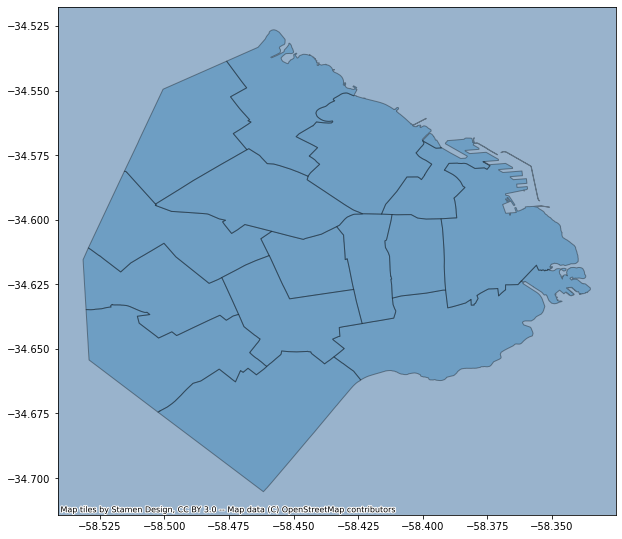

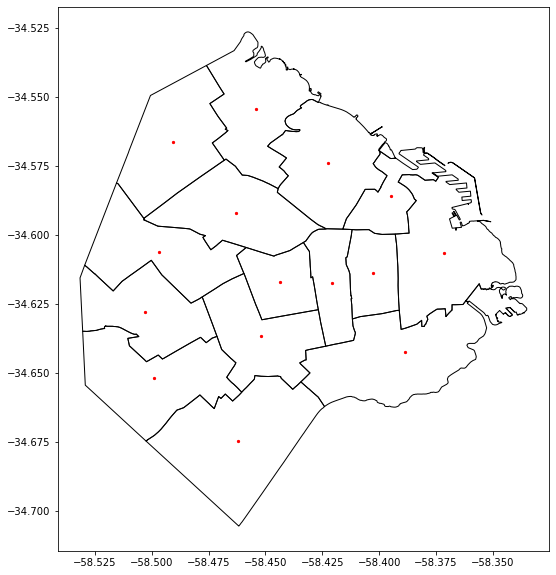

In [26]:
#Busco el EPSG

#comunas_.crs
comunas_= comunas_.to_crs(epsg=4326)
ax = comunas_.plot(figsize=(10, 10), alpha=0.35, edgecolor='k')
ctx.add_basemap(ax)

# calculo el centroide de cada radio
aux = comunas_.centroid
# ploteo mi mapa base
base = comunas_.plot( figsize=(10, 10), color='None', edgecolor='black')
# añado mis centroides
aux.plot(ax=base, marker='o', color='red', markersize=5)

<AxesSubplot:>

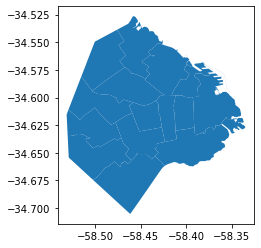

In [28]:
comunas_.plot()

In [17]:
#Este es el shp de CABA del  censo 2010.
caba_censo=gpd.read_file("C:/Users/W10/OneDrive/Escritorio/2° Cuatri/Metodologia de la OP/Clonados/MET4OP/dataset/censo2010/radios_censales/Codgeo_CABA_con_datos/cabaxrdatos.shp")

In [15]:
caba_censo.head()

,AREA,PERIMETER,PAIS0210_,PAIS0210_I,PROV,DEPTO,FRAC,RADIO,TIPO,LINK,VARONES,MUJERES,TOT_POB,HOGARES,VIV_PART,VIV_PART_H,geometry
0,1760908.00,7579.745,2,1,02,013,03,02,U,020130302,312.0,342.0,654.0,270.0,377.0,265.0,"POLYGON ((4192267.085 6152975.831, 4192240.425..."
1,2240206.00,14184.670,3,2,02,013,11,01,U,020131101,296.0,272.0,568.0,172.0,217.0,170.0,"POLYGON ((4193005.531 6152773.045, 4193022.852..."
2,28001.00,720.460,4,3,02,013,01,04,U,020130104,379.0,384.0,763.0,367.0,524.0,355.0,"POLYGON ((4192119.600 6153045.088, 4192222.042..."
3,68016.38,1084.790,5,4,02,013,01,03,U,020130103,286.0,326.0,612.0,258.0,314.0,254.0,"POLYGON ((4192119.600 6153045.088, 4192124.424..."
4,53839.88,948.102,6,5,02,013,01,02,U,020130102,373.0,397.0,770.0,343.0,408.0,340.0,"POLYGON ((4191961.799 6152874.180, 4191960.076..."


In [18]:
#DEPTO son las comunas
caba_censo.DEPTO.unique()

array(['013', '012', '014', '002', '015', '001', '011', '005', '003',
       '006', '010', '007', '004', '009', '008'], dtype=object)

In [20]:
caba_censo.shape

(3555, 17)

In [32]:
nbi=pd.read_csv("C:/Users/W10/OneDrive/Escritorio/2° Cuatri/Metodologia de la OP/Clonados/MET4OP/dataset/censo2010/Labels/HOGAR-ALGUNBI-LABELS.CSV", sep=";")

In [33]:
nbi.head()

,ALGUNBI,label
0,0,Hogares sin NBI
1,1,Hogares con NBI
2,3,MISSING
3,2,NOTAPPLICABLE
